In [32]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

from sklearn.decomposition import PCA

# Dimensionality Reduction

In [34]:
points = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]]).rvs(size=5000)

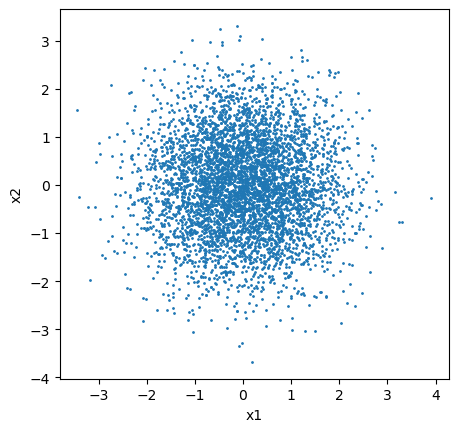

In [35]:
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.xlabel("x1")
plt.ylabel("x2")


plt.gca().set_aspect("equal")
plt.show()

In [36]:
x_center = np.mean(points, axis=0)

In [37]:
centered_points = points - x_center

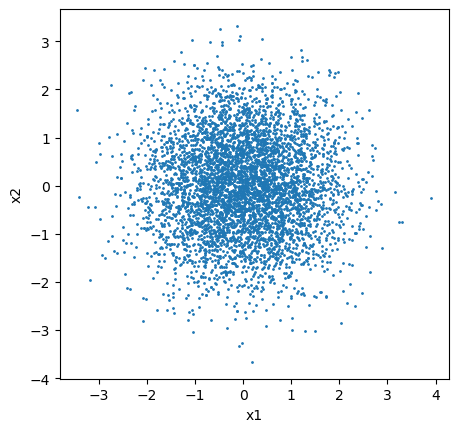

In [38]:
plt.scatter(centered_points[:, 0], centered_points[:, 1], s=1)
plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().set_aspect("equal")
plt.show()

In [39]:
centered_points.mean(axis=0)

array([1.55875313e-17, 3.37063710e-17])

In [40]:
covariance_matrix = np.cov(points[:, 0], points[:, 1])

In [50]:
covariance_matrix

array([[ 0.99400878, -0.00628133],
       [-0.00628133,  1.00177878]])

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [42]:
eigenvectors[:, 0]

array([-0.87350364, -0.48681761])

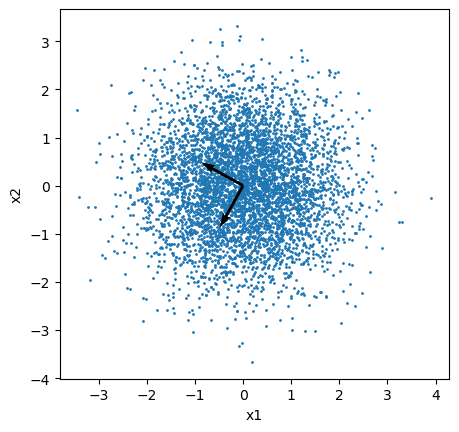

In [49]:
plt.scatter(centered_points[:, 0], centered_points[:, 1], s=1)
plt.quiver([0, 0], [0, 0], [eigenvectors[0][0], eigenvectors[1][0]], [eigenvectors[0][1], eigenvectors[1][1]], angles = "xy", scale_units = "xy", scale = 1)

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().set_aspect("equal")
plt.show()

In [51]:
np.dot(eigenvectors[:, 0], eigenvectors[:, 1])

1.3834548576824091e-18

In [52]:
np.linalg.inv(eigenvectors)

array([[-0.87350364, -0.48681761],
       [ 0.48681761, -0.87350364]])

In [53]:
np.linalg.inv(eigenvectors) @ np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors

array([[0.99400878, 0.00628133],
       [0.00628133, 1.00177878]])

In [54]:
covariance_matrix

array([[ 0.99400878, -0.00628133],
       [-0.00628133,  1.00177878]])

In [57]:
points @ (np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors)

array([[ 2.41727822, -1.89296164],
       [ 0.11318315, -1.47088659],
       [-0.56481825, -0.37850397],
       ...,
       [-0.77387946,  0.41584013],
       [-0.87185299, -0.71076075],
       [-0.90488879, -0.28298655]])

In [58]:
pca = PCA()

In [59]:
pca.fit(points)

PCA()

In [60]:
pca.components_

array([[ 0.48681761, -0.87350364],
       [-0.87350364, -0.48681761]])

In [61]:
eigenvectors

array([[-0.87350364,  0.48681761],
       [-0.48681761, -0.87350364]])

In [62]:
pca.explained_variance_

array([1.00527947, 0.99050809])

In [63]:
eigenvalues

array([0.99050809, 1.00527947])